In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets, models, transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
torch.__version__, torchvision.__version__

('2.0.1+cu117', '0.15.2+cu117')

**Getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.datasets


In [2]:
#Setup training data
train_data = datasets.FashionMNIST(root='data',
                                   train=True,
                                   download=True,
                                   transform=ToTensor(),
                                   target_transform=None)
test_data = datasets.FashionMNIST(root='data',
                                   train=False,
                                   download=True,
                                   transform=ToTensor(),
                                   target_transform=None)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
#See the first training example
image, label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

###1.2 Visualizing our data


Image shape:torch.Size([1, 28, 28])


Text(0.5, 1.0, '[9]')

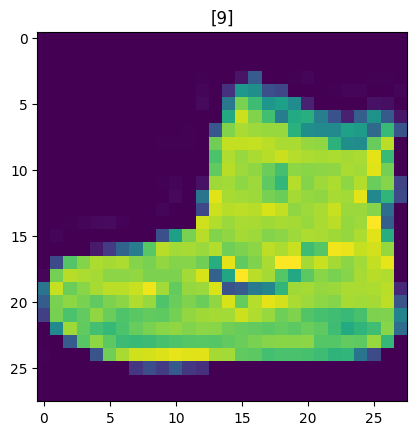

In [9]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape:{image.shape}")
plt.imshow(image.squeeze())
plt.title([label])
      

(-0.5, 27.5, 27.5, -0.5)

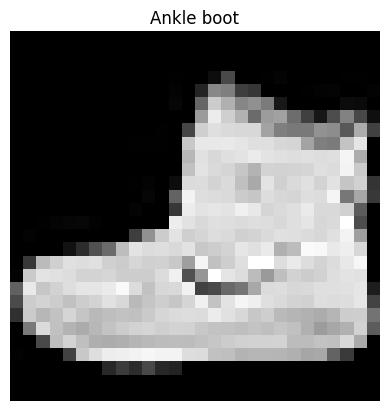

In [10]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

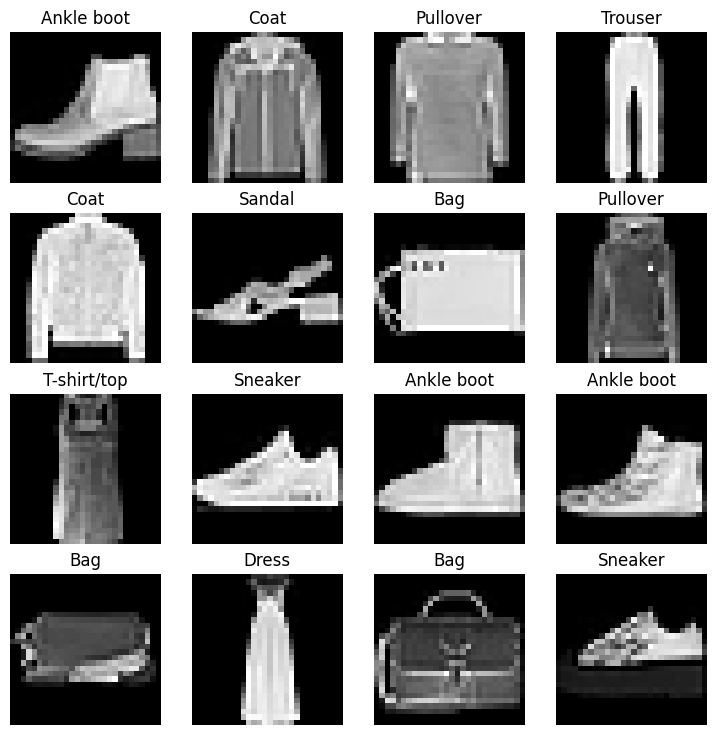

In [11]:
#Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

Do you think these items of clothing (images) could be modelled with pure linear lines? Or do you think we'll need non-linearities?

##2. Prepare DataLoader
Right now, our data is in the form of PyTorch Datasets.
DataLoader turns our dataset into a Python iterable.
More specifically, we want to turn our data into batches (Or mini-batches)
Why would we do this?
1. It is more computationally efficient, as in , your computer hardware might not be able to look (store in memory) at
   60000 images in one hit. So we breka it down to 32 images at a time.
2. It gives our neural network more chances to upgrade its gradietns per epoch.
    


In [13]:
from torch.utils.data import DataLoader

#Setup the batch size hyperparameter
BATCH_SIZE = 32

#Turn datasets into dataloaders
train_dataloader = DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

In [14]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x205027befe0>,
 <torch.utils.data.dataloader.DataLoader at 0x205027a1ba0>)

In [15]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [16]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

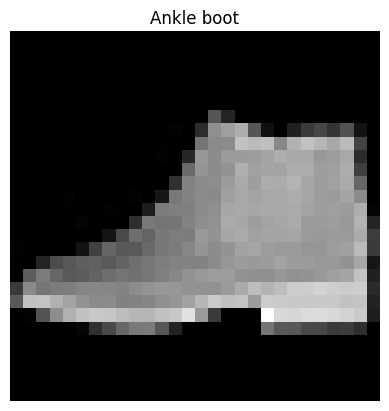

In [17]:
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch),size=[1]).item()
img,label= train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

In [18]:
## 3. Model 0: Build a baseline model

##Create a flatten layer
flatten_model = nn.Flatten()

##Get a single sample
x = train_features_batch[0]

output = flatten_model(x)



In [19]:
from torch import nn
class FashionMNistModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )
    def forward(self, x):
        return self.layer_stack(x)
    

In [20]:
torch.manual_seed(42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_0 = FashionMNistModelV0(
    input_shape=28*28,
    hidden_units = 10,
    output_shape = len(class_names)
).to(device)

model_0

FashionMNistModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
dummy_x = torch.rand([1,1,28,28]).to(device)
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [22]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163], device='cuda:0')),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0

#3.1 Setup Loss, Optimizer, and Evaluation metrics

Loss function --> 'nn.CrossEntropyLoss()'
Optimizer --> 'torch.optim.SGD()'
Evaluation metrics--> Accuracy 

In [23]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open('helper_functions.py', 'wb') as f:
        f.write(request.content)


helper_functions.py already exists, skipping download


In [24]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)



#3.2 Creating a function to time our experiments
Machine Learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs



In [25]:
from timeit import default_timer as timer

def print_train_time(start:float,
                     end: float,
                     device:torch.device =None):
    total_time = end - start
    print(f'Train time on {device}: {total_time:.3f} seconds')
    return total_time


In [26]:
start_time = timer()
end_time = timer()
print_train_time(start_time, end_time, device='cpu')

Train time on cpu: 0.000 seconds


2.169999061152339e-05

###3.3 Creating a training loop and training a model on batches of data

1. Loop through epoch.
2. Loop through training batches, perform training steps, calculate the train loss *per patch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all.

In [27]:
from tqdm.auto import tqdm 

#Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()
model_0.to('cpu')

#Set the number of epochs
epochs=3

#Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    train_loss = 0
    #Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)
        
        loss= loss_fn(y_pred, y)
        train_loss += loss #accumulate train loss
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
                        
    train_loss /= len(train_dataloader)
    
    #Testing 
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            test_pred = model_0(X_test)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
            
        #Calculate the test loss average per batch
        test_loss /= len(test_dataloader)
    
        #Calculate the test acc average per batch
        test_acc /= len(test_dataloader)
    
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%")
    
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model_0.parameters()).device))
            

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095 | Test acc: 82.04%
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799 | Test acc: 83.20%
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766 | Test acc: 83.43%
Train time on cpu: 29.200 seconds


In [28]:
str(next(model_0.parameters()).device)

'cpu'

In [29]:
##4. Make predictions and get Model 0 results
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
    loss, acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X,y = X.to(device), y.to(device)
            #Make predictions
            y_pred = model(X)
            
            #Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        #Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        return {"model_name": model.__class__.__name__,
                "model_loss": loss.item(),
                "model_acc": acc}

model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn = loss_fn, accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNistModelV0',
 'model_loss': 0.4766389727592468,
 'model_acc': 83.42651757188499}

In [30]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [31]:
#Create a model with non-linear & non-linear layer
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
                nn.Flatten(),
                nn.Linear(in_features=input_shape, out_features=hidden_units),
                nn.ReLU(),
                nn.Linear(in_features=hidden_units, out_features=output_shape),
                nn.ReLU(),
            )
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [32]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, output_shape=len(class_names), hidden_units=10).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [33]:
##Setup loss, optimizer & evaluation metrics
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

6.2 Functionizing trainig and evaluation/testing loops

In [34]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device,
               ):
    
    train_loss, train_acc = 0, 0
    model.train()
    #Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(data_loader):
            X,y = X.to(device), y.to(device)
            y_pred = model(X)
        
            loss= loss_fn(y_pred, y)
            train_loss += loss #accumulate train loss
            train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
            optimizer.zero_grad()
        
            loss.backward()
        
            optimizer.step()   
                           
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    if batch % 400 == 0:
        print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%\n")

In [35]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    
    test_loss, test_acc = 0, 0
   
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X,y = X.to(device), y.to(device)
            test_pred = model(X)
            
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
            
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")


In [36]:
torch.manual_seed(42)
from timeit import default_timer as timer

train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    train_step(model=model_1,
                  data_loader=train_dataloader,
                  loss_fn=loss_fn,
                  optimizer=optimizer,
                  accuracy_fn=accuracy_fn,
                  device=device)
        
    test_step(model=model_1,
                  data_loader=test_dataloader,
                  loss_fn=loss_fn,
                  accuracy_fn=accuracy_fn,
                  device=device)
        
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(train_time_start_on_gpu ,train_time_end_on_gpu, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Test loss: 0.95636 | Test acc: 65.00%

Epoch: 1
------
Test loss: 0.72227 | Test acc: 73.91%

Epoch: 2
------
Test loss: 0.68500 | Test acc: 75.02%

Train time on cuda: 35.893 seconds


In [37]:
model_1_results = eval_model(model=model_1, data_loader=test_dataloader, loss_fn = loss_fn, accuracy_fn = accuracy_fn)
model_1_results,model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

({'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.6850008368492126,
  'model_acc': 75.01996805111821},
 {'model_name': 'FashionMNistModelV0',
  'model_loss': 0.4766389727592468,
  'model_acc': 83.42651757188499})

Model 2: Building a convolutional neural network

In [39]:
from torch import nn

In [147]:
#Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels= input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1,
                      ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1,
                     ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1,
                     ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),        
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape,
                      
                     )
        )
        
    def forward(self, x):
        x= self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x
            

In [148]:
images = torch.randn(size=(32,3,64,64))
test_image = images[0]
images.shape, test_image.shape, image.shape
image = image.to(device)

In [149]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1
                      )
#pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

In [120]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)
test_image_through_conv = conv_layer(test_image)
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
test_image_through_conv.shape, test_image_through_conv_and_max_pool.shape

(torch.Size([10, 64, 64]), torch.Size([10, 32, 32]))

In [153]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)
                             ).to(device)

In [155]:
rand_image_tensor = torch.randn(size=(1,28,28)).unsqueeze(0)
rand_image_tensor.size()
model_2(rand_image_tensor.to(device))



tensor([[ 4.1192e-02, -8.2341e-02,  7.5602e-02, -4.1436e-02,  4.5663e-03,
          3.9489e-02,  2.0087e-02, -1.9366e-05, -1.0700e-02, -1.1218e-02]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [156]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)


In [157]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

#Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch:{epoch}\n----------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               optimizer=optimizer,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               device=device
    )
          
    test_step(model=model_2,
               data_loader=test_dataloader,
               loss_fn= loss_fn,
               accuracy_fn=accuracy_fn,
               device=device
    )
          
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2, end=train_time_end_model_2, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
----------
Test loss: 0.39441 | Test acc: 85.81%

Epoch:1
----------
Test loss: 0.34757 | Test acc: 87.00%

Epoch:2
----------
Test loss: 0.32901 | Test acc: 87.74%

Train time on cuda: 37.801 seconds


In [162]:
model_2_results = eval_model(model=model_2,
                             data_loader= test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device
                             
                            )
model_0_results, model_1_results, model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

({'model_name': 'FashionMNistModelV0',
  'model_loss': 0.4766389727592468,
  'model_acc': 83.42651757188499},
 {'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.6850008368492126,
  'model_acc': 75.01996805111821},
 {'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.32901495695114136,
  'model_acc': 87.73961661341853})

In [164]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNistModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.329015,87.739617


In [166]:
# Add training time to results comparison
compare_results['training _time'] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training _time
0,FashionMNistModelV0,0.476639,83.426518,29.200116
1,FashionMNISTModelV1,0.685001,75.019968,35.893081
2,FashionMNISTModelV2,0.329015,87.739617,37.800804


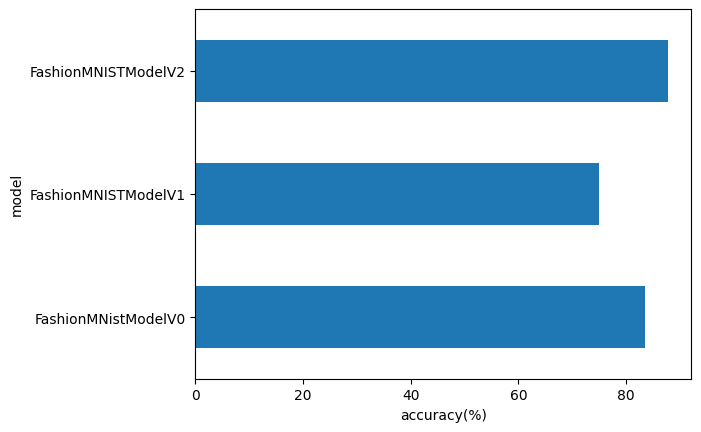

In [171]:
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('accuracy(%)')
plt.ylabel('model')

In [181]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device
                    ):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            
            pred_logit = model(sample)
            
            pred_prob= torch.softmax(pred_logit.squeeze(), dim=0)
            
            pred_probs.append(pred_prob.cpu())
            
    return torch.stack(pred_probs)
            

In [215]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
    
test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

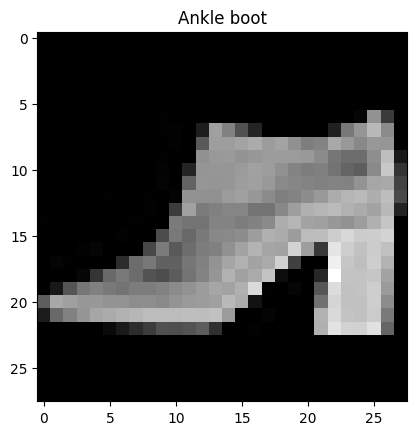

In [216]:
plt.imshow(test_samples[0].squeeze(0), cmap='gray')
plt.title(class_names[test_labels[0]])

In [217]:
pred_probs = make_predictions(model=model_2,
                              data=test_samples,
                             )
pred_classes = pred_probs.argmax(dim=1)
test_labels, pred_classes

([9, 4, 2, 9, 7, 6, 4, 0, 5], tensor([9, 4, 6, 9, 7, 0, 4, 0, 5]))

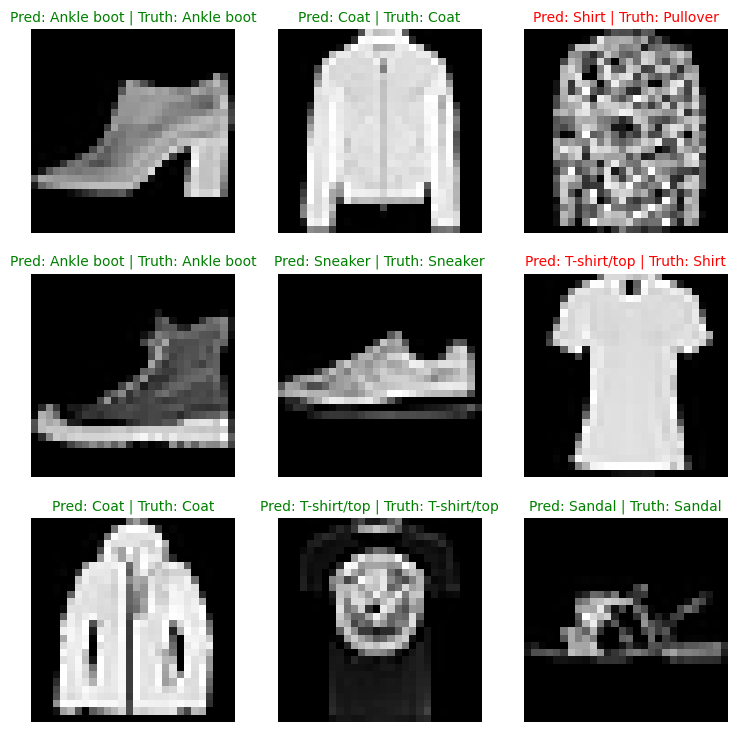

In [218]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
    #Create a subplot
    plt.subplot(nrows,ncols,i+1)
    
    plt.imshow(sample.squeeze(), cmap='gray')
    pred_label = class_names[pred_classes[i]]
    
    truth_label = class_names[test_labels[i]]
    
    title_text = f'Pred: {pred_label} | Truth: {truth_label}'
    
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g')
    else:
        plt.title(title_text, fontsize=10, c='r')
    plt.axis(False)


In [225]:
#10. Making a confusion matrix for further prediction evaluation
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Making predictions...'):
        #Send the data and targets to target device
        X,y= X.to(device), y.to(device)
        y_logit = model_2(X)
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        #Put prediction on CPU for evaluation
        y_preds.append(y_pred.cpu())
        
    #Concatenate list of predictions into a tensor
#     print(y_preds)
    y_pred_tensor = torch.cat(y_preds)
    print(y_pred_tensor[:10])
len(y_pred_tensor)

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])


10000

In [228]:
import mlxtend
mlxtend.__version__

'0.23.0'

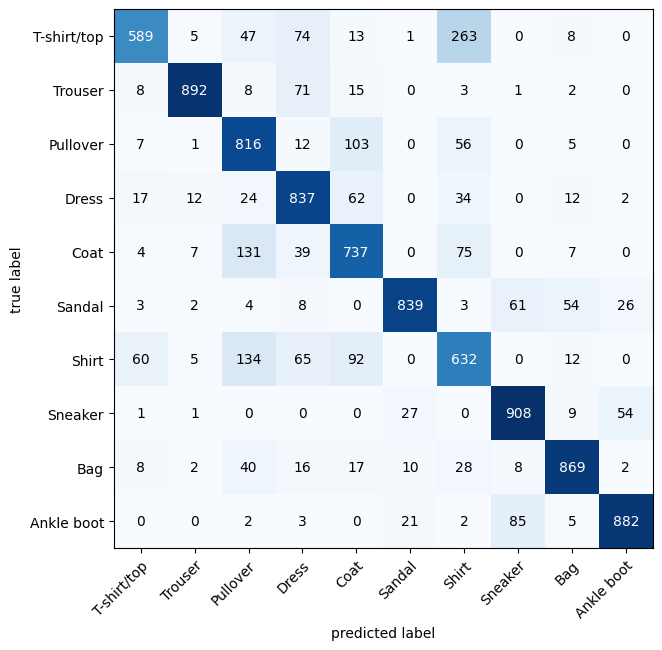

In [235]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names= class_names,
    figsize=(10,7),
)

In [239]:
from pathlib import Path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME='03_pytorch_computer_vision_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

In [243]:
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names)) 
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [244]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32901495695114136,
 'model_acc': 87.73961661341853}

In [245]:
loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn
)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32901495695114136,
 'model_acc': 87.73961661341853}

In [250]:
torch.isclose(torch.tensor(model_2_results['model_loss']), torch.tensor(loaded_model_2_results['model_loss']), atol=1e-02)

tensor(True)